Here are a couple of things that are useful when dealing with multidimensional functions using the numpy library

In [1]:
import numpy

# Vectorisation

The thing that makes numpy arrays different from lists is that they are built to do math rather than contain elements:

In [2]:
a = numpy.array([1, 2, 3])

Most of the math operators will "vectorise", that is, handle the implicit looping over elements which is often useful in array math.

In [3]:
a / a

array([ 1.,  1.,  1.])

In [4]:
a * a

array([1, 4, 9])

But the operators you don't think of as math also vectorise

In [5]:
[1, 2, 3] < a 

array([False, False, False], dtype=bool)

This is useful when combined with "fancy indexing":

In [6]:
a[a<2]

array([1])

In many cases, numpy will automatically convert inputs passed as lists to arrays, so this works as well:

In [7]:
a[[True, False, False]]

array([1])

# Multidimensional arrays

Let's do a common task in optimisation: we want to visualise a function of two variables:

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def f(x, y):
    return (x-1)**2 + y**2

We could do this with two for loops:

In [10]:
xs = numpy.linspace(-10, 10, 100)
ys = numpy.linspace(-10, 10, 100)

In [11]:
zs = []
for y in ys:
    row = []
    for x in xs:
        row.append(f(x, y))
    zs.append(row)
zs = numpy.array(zs)

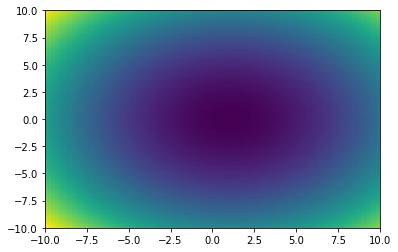

In [12]:
plt.pcolor(xs, ys, zs)

But this is tedious, repetitive and error prone (would you remember the x has to be in the inner loop?), so numpy as a way of handling this. We can use the function `numpy.meshgrid` to create two dimensional arrays which have elements corresponding to the combinations we need.

In [13]:
x, y = numpy.meshgrid([1, 2, 3], [10, 20, 30])

In [14]:
x, y

(array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]), array([[10, 10, 10],
        [20, 20, 20],
        [30, 30, 30]]))

Notice that we can now rely on vectorisation to handle the looping for us.

In [15]:
x + y

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [16]:
xx, yy = numpy.meshgrid(xs, ys)

In [17]:
zs = f(xx, yy)

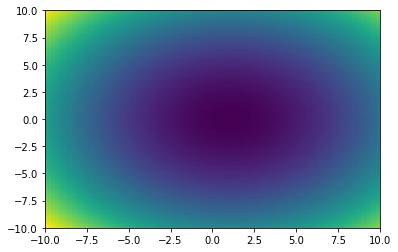

In [18]:
plt.pcolor(xs, ys, zs)

# Automatic vectorisation

One of the reasons we like numpy is that it supplies vectorised versions of functions. We know that the `math.sin` for instance doesn't work with arrays

In [19]:
import math

In [20]:
math.sin(xs)

TypeError: only length-1 arrays can be converted to Python scalars

Numpy supplies a solution, which can wrap scalar functions to be array aware:

In [21]:
vect_math_sin = numpy.vectorize(math.sin)

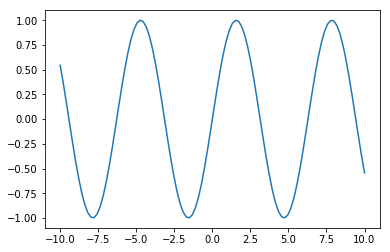

In [22]:
plt.plot(xs, vect_math_sin(xs))

So you could vectorize your own functions in this way:

In [23]:
def myfun(x):
    return math.sin(x) + 1

myfun = numpy.vectorize(myfun)

In [24]:
myfun([1, 2])

array([ 1.84147098,  1.90929743])

But this is also a common enough operation that Python has special syntax for it, called decorators:

In [25]:
@numpy.vectorize
def myfun2(x):
    return math.sin(x) + 1

In [26]:
myfun2([1, 2])

array([ 1.84147098,  1.90929743])